## Housing prices

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

link to competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Colaberator: Ingrid Klepsvik & Preben Haukebø
References: 
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook
https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

## Setup

First, lets import some of the common modules and make shure that matplotlib plots inline. We also choose to ignore warnings. Then we import the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/train.csv')
final_test=pd.read_csv('Dataset/test.csv')
original_data = df.copy()
y_final = df['SalePrice'].copy()

In the blocks below we look at some of the key features of the dataset to get a general idea of which attribute and values the dataset contains.

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Discover and visualize the data to gain insight

Creates a scatter plot to get a visualization of the relationship between general living area above ground and sale price, which is attributes that may have a strong relationship. As we can see, there is a couple of outliers down in the right corner.

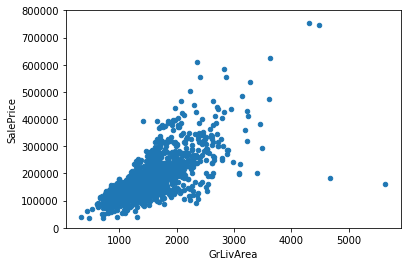

In [6]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We do the same thing with overall quality and sale price.

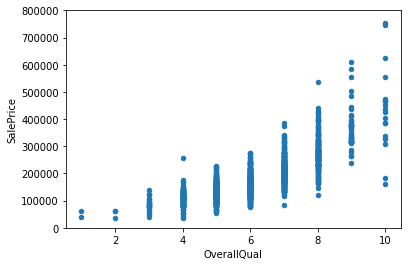

In [7]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0, 800000));

The best way to get a overview of the realtionships between attributes is to use a heatmap. 

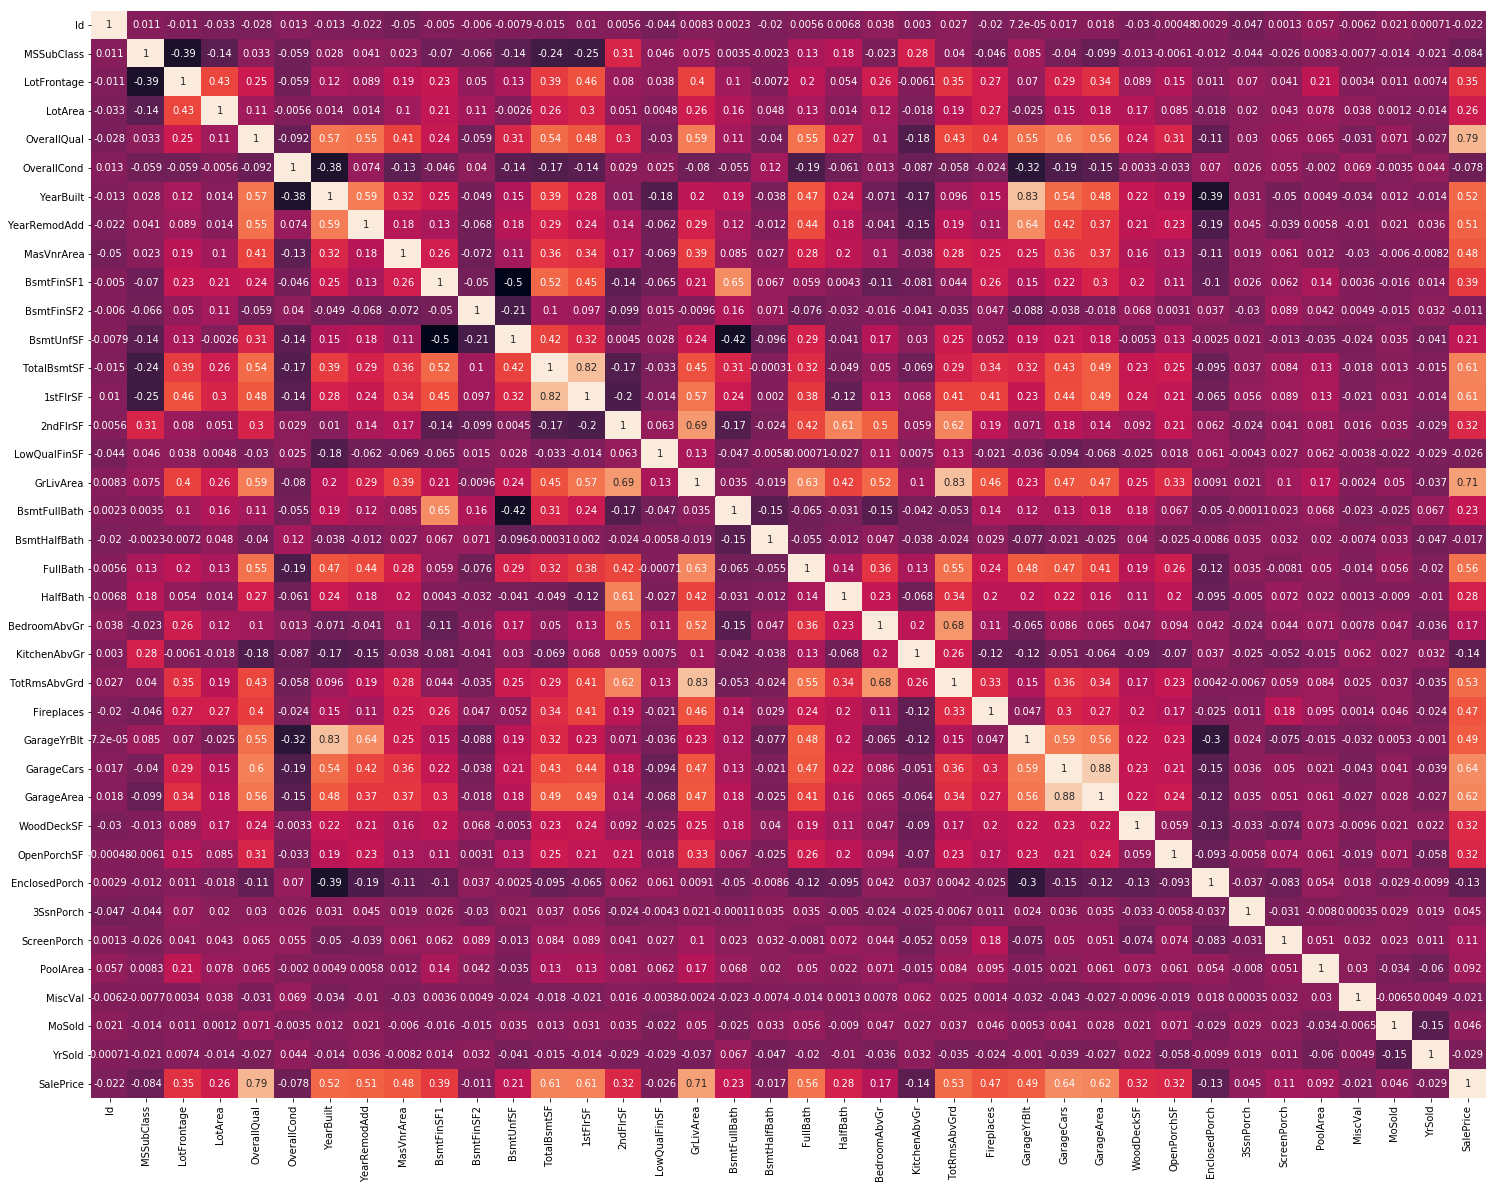

In [8]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(),cbar=False, annot=True);

This is too much. This heatmap gives a general overview of the correlations between attributes, but it is to big and complicated to continue working with.

Lets reduse the heatmap to 10 attributes and focus on the correlation against sale price.

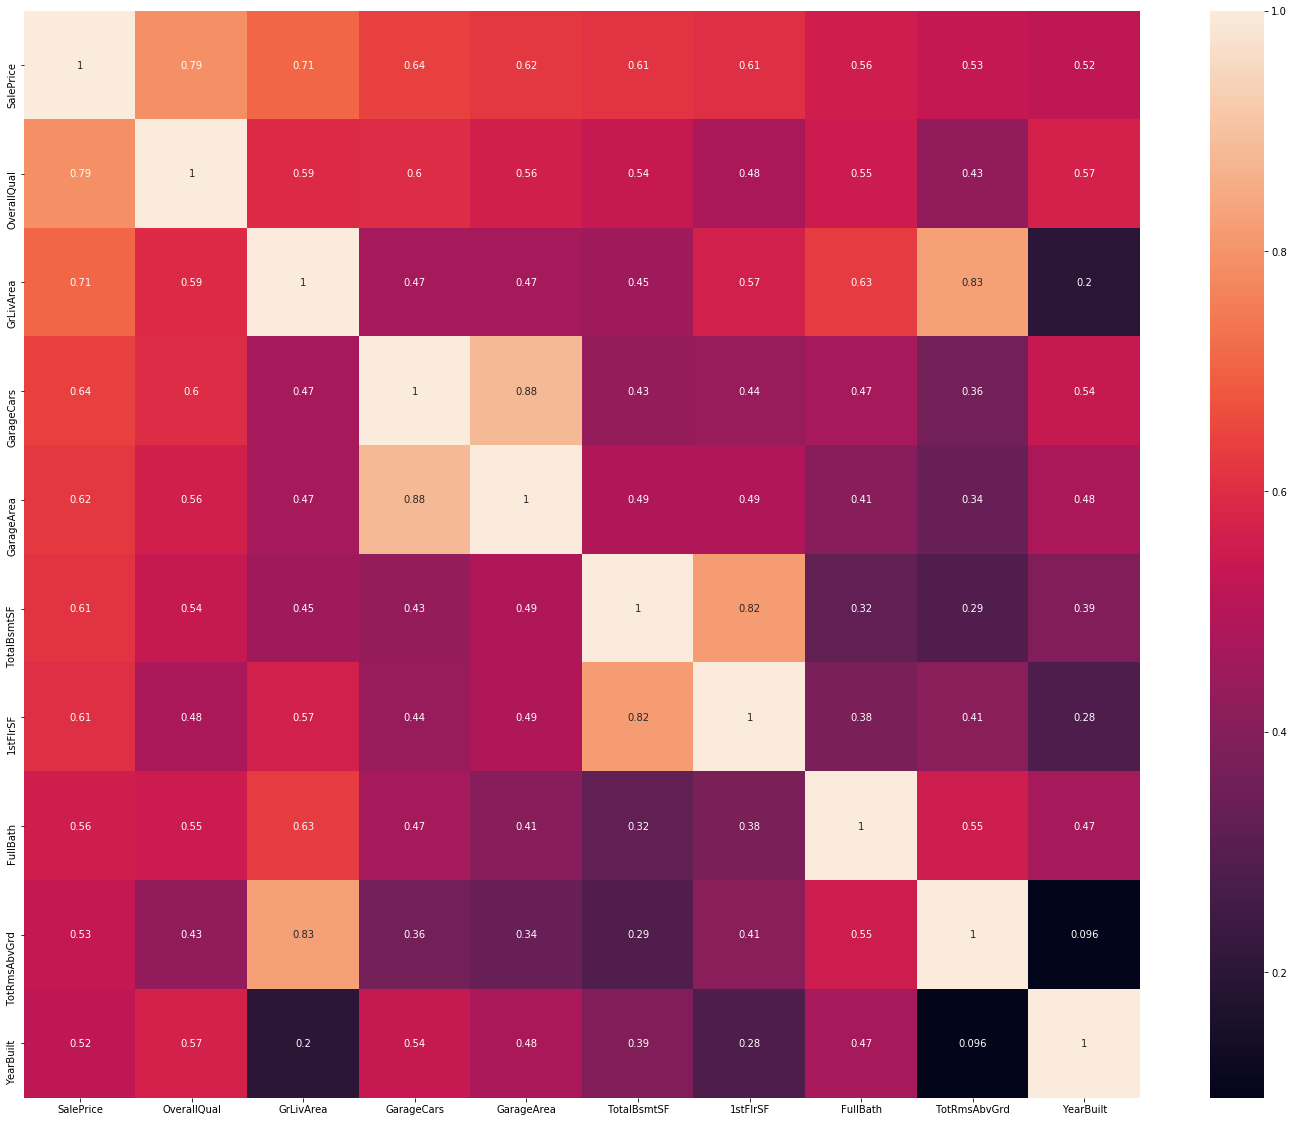

In [9]:
k=10
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(25,20))
sns.heatmap(df[cols].corr(), annot=True, yticklabels=cols.values, xticklabels=cols.values)

These are the variables that correlates most to sale price. Overall quality, general living area above ground and total basement messured in square feet has extremly good correlation. Our previous guess using scatter plots turned out to be pretty good.   

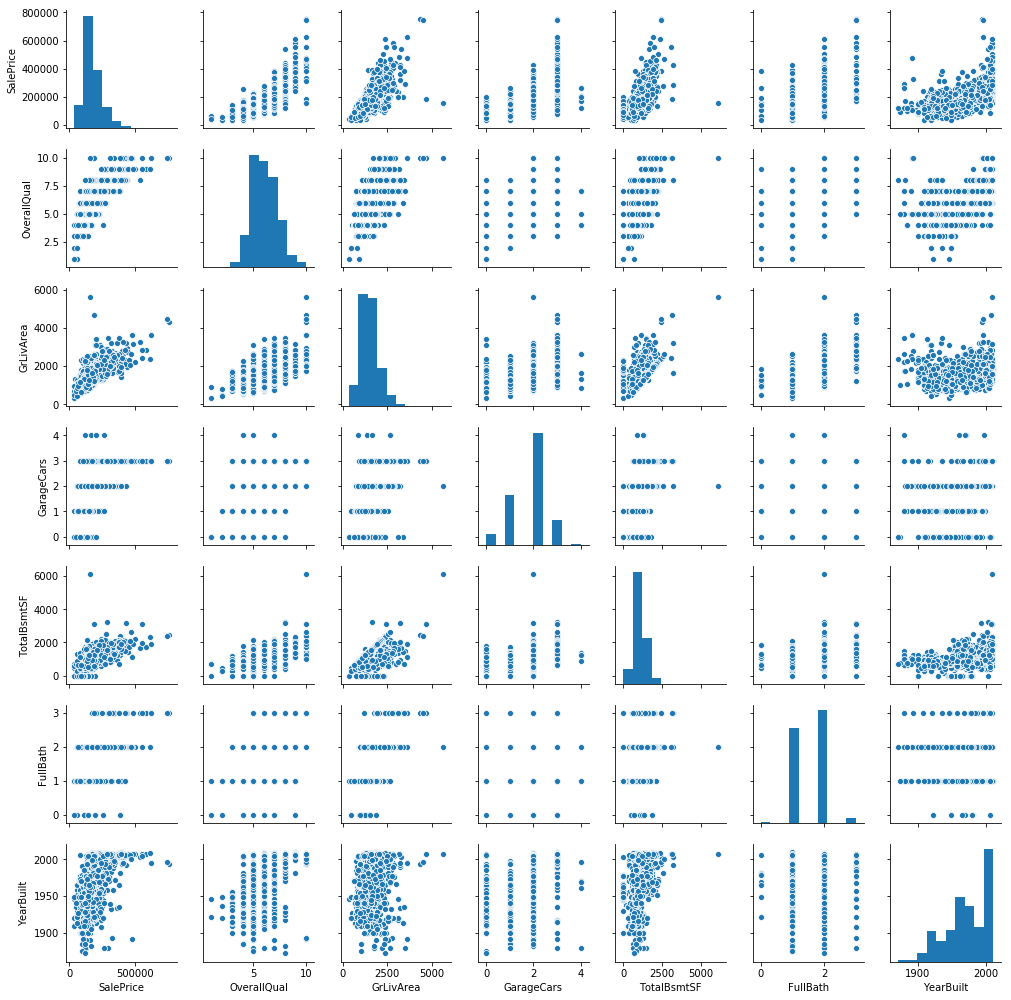

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.0)


We already knew that all of these attributes were closly linked, but by putting every attribute in a scatter plot we get a reasonable idea of the relationship between the highest correlating attributes. 

## Prepare the data

If we look at the train.csv file we can easly see that some of the attributes are missing some data, either in the form of NaN or 0. Now we have to see if the missing data is relevant for us when we have to make our decission.

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


These are the 20 variabels missing data. We have two options, either we delete the attributes or we fill in the missing data. By looking at the correlation heatmap none of these attributes have a significant correlation with sale price or is represented better with other attributes (e.g GarageCars or GarageArea), so we choose to delete the attributes. Since "Electrical" only is missing one feature, we choose to just delete the one feature where the data is missing.

In [12]:
# deleting missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

In [13]:
df.shape

(1459, 63)

Now we don't have any missing data anymore.

By using StratifiedShuffleSplit we devide the dataset into a training set and a test/validation set.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['OverallQual']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
df['OverallQual'].value_counts() /len(df)

5     0.271419
6     0.256340
7     0.218643
8     0.115147
4     0.079507
9     0.029472
3     0.013708
10    0.012337
2     0.002056
1     0.001371
Name: OverallQual, dtype: float64

In [16]:
strat_train_set['OverallQual'].value_counts() / len(strat_train_set)

5     0.272282
6     0.258570
7     0.218413
8     0.114594
4     0.075416
9     0.029383
3     0.015671
10    0.012733
2     0.001959
1     0.000979
Name: OverallQual, dtype: float64

We check that the distribution for overall quality is representative in our new strat-train_set by comparing the distribution of our original dataset.

We make a copy of the sale price attribute for future usage and also makes a new training set where we drop the sale price.

In [58]:
y = strat_train_set['SalePrice'].copy()
y_test = strat_test_set['SalePrice'].copy()

In [59]:
dft = strat_train_set.drop(columns='SalePrice').copy()
test_test = strat_test_set.drop(columns='SalePrice').copy() 

Instead of using label encoder or oneHotEncoder, we chose to use the get_dummies function in pandas. This function gives a numerical value to each category and its content. 

In [60]:
dft = pd.get_dummies(dft)
test_test = pd.get_dummies(test_test)

In [62]:
pd.get_dummies(df).shape


(1459, 222)

By looking at the shape of the new dataFrame we now have 222 categories instead of 63.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [22]:
from sklearn.compose import ColumnTransformer

num_attribs = list(dft)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])
housing_prepared = full_pipeline.fit_transform(dft)

In [23]:
housing_prepared

array([[-1.24575245, -0.87816291, -0.09172788, ..., -0.12210871,
         0.47196874, -0.30711464],
       [-0.73330226, -0.87816291, -0.17809306, ..., -0.12210871,
        -2.11878439,  3.25611313],
       [-0.61230707, -0.87816291,  0.03769507, ..., -0.12210871,
         0.47196874, -0.30711464],
       ...,
       [-1.138992  ,  0.07961979, -0.18046436, ..., -0.12210871,
         0.47196874, -0.30711464],
       [ 0.21093468, -0.87816291, -0.07188386, ..., -0.12210871,
         0.47196874, -0.30711464],
       [-0.43911788, -0.87816291,  0.13691518, ..., -0.12210871,
         0.47196874, -0.30711464]])

In [24]:
train = pd.DataFrame(housing_prepared)

In [25]:
train.info()
y_original = y.copy
y = y.reset_index().drop(columns='index')['SalePrice']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Columns: 214 entries, 0 to 213
dtypes: float64(214)
memory usage: 1.7 MB


Creates a function for printing out prediction and labels

In [26]:
def print_pred_labels (preds, labels):
    print('Preds:               labels:')
    for i in range (len(preds)):
        print(preds[i], labels[i], sep='  #  ')              

In [27]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,-1.245752,-0.878163,-0.091728,1.373831,-0.541313,1.111633,0.997958,1.433482,-0.285807,0.140669,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115
1,-0.733302,-0.878163,-0.178093,0.649305,-0.541313,1.211047,1.094942,-0.915046,-0.285807,1.689944,...,-0.054286,3.318398,-0.044302,-2.540188,-0.27338,-0.044302,-0.099454,-0.122109,-2.118784,3.256113
2,-0.612307,-0.878163,0.037695,0.649305,-0.541313,-0.015060,-0.699264,0.749231,-0.285807,-0.141833,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115
3,1.418514,0.079620,-0.017469,0.649305,-0.541313,0.713977,0.367561,0.519675,-0.285807,-1.090231,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115
4,-1.347768,-0.878163,-0.390137,-0.799745,1.253105,-0.677820,-1.669105,-0.968020,-0.285807,-1.260629,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115


## Select and train a model

Here we use linear regression to train our model.

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
some_data = dft.iloc[:10]
some_labels = y.iloc[:10]
some_prepared_data = full_pipeline.transform(some_data)

preds = pd.Series(linreg.predict(some_prepared_data))
print_pred_labels(preds=preds, labels=some_labels)

Preds:               labels:
319096.01993205026  #  274900
192508.01993205026  #  181134
183960.01993205026  #  167000
245800.01993205026  #  190000
110000.01993205026  #  109500
124888.01993205026  #  89471
183360.01993205026  #  179600
154056.01993205026  #  160000
221048.01993205026  #  187750
110818.01993205026  #  120500


In [30]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(train)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20424.234030614152

In [31]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, housing_predictions)
lin_mae

13844.027326483594

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
lin_scores = cross_val_score(linreg, train, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.31275077e+16 2.07881137e+15 1.73540549e+17 2.49301919e+15
 1.20808094e+17 6.88943324e+17 2.63435387e+04 2.55660869e+16
 9.23037404e+16 6.02774006e+14]
Mean: 1.129463907234538e+17
Standard deviation: 2.0037573133770493e+17


The cross-validation for linear regression doesn't work.

Using decision tree regression to train our model.

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [35]:
housing_prediction = tree_reg.predict(train)
tree_mse = mean_squared_error(y, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The model is overfitting the data which is why the rmse(root mean square error) is 0. This also means that the model can't be used.

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [37]:
display_scores(tree_rmse_scores)

Scores: [32124.87501725 39840.25221727 37042.73957863 38948.63508067
 41164.8805999  32070.93039547 33574.33200831 30376.78792269
 45744.13408864 39845.54497768]
Mean: 37073.311188650354
Standard deviation: 4662.405392806496


We use XGBoost to train our model. XGBoost is a gradient boosting framework and the algorithm provides parallel tree boosting.

In [38]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
housing_prediction = xgb_reg.predict(train)
xgb_mse = mean_squared_error(y, housing_prediction)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

13912.488827497129

In [40]:
scores = cross_val_score(xgb_reg, train, y,
                         scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-scores)

In [41]:
display_scores(xgb_rmse_scores)

Scores: [23074.219534   23268.90033584 25509.86069165 22588.41829117
 27657.37404192 23571.29027344 24033.39834426 20947.89076951
 43131.81277845 29193.71061727]
Mean: 26297.687567750738
Standard deviation: 6072.4598813899765


As we can see, XGBoost gets a much better result and we choose this as our model.

In [42]:
predict = xgb_reg.predict(train)

from sklearn.metrics import mean_absolute_error
print(str(mean_absolute_error(predict, y)))

10068.316065744368


## Fine-tune your model

In [46]:
from sklearn.model_selection import KFold
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

The paramteres is inspired by the stacked regression notebook referenced above, but some of the paramteres is tweeked a bit to get a better result for my version.

In [47]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =9, nthread = -1)

In [48]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 24657.6109 (5916.0818)



## solution

In [49]:
percent = (final_test.isnull().sum()/final_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

final_test = final_test.drop((missing_data[missing_data['Total'] > 1]).index, 1)
final_test = final_test.drop(final_test.loc[final_test['Electrical'].isnull()].index)


In [50]:
final_test = pd.get_dummies(final_test)

In [51]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [52]:
num_attribs = list(final_test)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])
housing_prepared = full_pipeline.fit_transform(final_test)

In [53]:
final_test = pd.DataFrame(housing_prepared)

In [57]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(final_test, y_final)

XGBoostError: b'[14:53:11] src/objective/regression_obj.cc:44: Check failed: preds->Size() == info.labels_.size() (1459 vs. 1460) labels are not correctly providedpreds.size=1459, label.size=1460\n\nStack trace returned 7 entries:\n[bt] (0) 0   libxgboost.dylib                    0x00000001154a6226 dmlc::StackTrace() + 246\n[bt] (1) 1   libxgboost.dylib                    0x00000001154a5fef dmlc::LogMessageFatal::~LogMessageFatal() + 47\n[bt] (2) 2   libxgboost.dylib                    0x0000000115523c51 xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float>*, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 593\n[bt] (3) 3   libxgboost.dylib                    0x00000001154a2734 xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*) + 996\n[bt] (4) 4   libxgboost.dylib                    0x00000001154be90c XGBoosterUpdateOneIter + 172\n[bt] (5) 5   _ctypes.cpython-36m-darwin.so       0x0000000105fe2237 ffi_call_unix64 + 79\n[bt] (6) 6   ???                                 0x00007ffeebb16d40 0x0 + 140732852694336\n\n'